In [1]:
import numpy as np
import numpy.random as rnd
import matplotlib
import matplotlib.pyplot as plt
# to make this notebook's output stable across runs
rnd.seed(42)

DATASETS_URL = "https://github.com/ageron/handson-ml/raw/master/datasets"

import os
import tarfile
from six.moves import urllib

HOUSING_PATH = "datasets/housing"
HOUSING_URL = DATASETS_URL + "/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.exists(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [2]:
fetch_housing_data()

In [3]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

housing = load_housing_data()
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [150]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [151]:
housing['housing_median_age'].value_counts()

52.0    1273
36.0     862
35.0     824
16.0     771
17.0     698
34.0     689
26.0     619
33.0     615
18.0     570
25.0     566
32.0     565
37.0     537
15.0     512
19.0     502
27.0     488
24.0     478
30.0     476
28.0     471
20.0     465
29.0     461
31.0     458
23.0     448
21.0     446
14.0     412
22.0     399
38.0     394
39.0     369
42.0     368
44.0     356
43.0     353
40.0     304
13.0     302
41.0     296
45.0     294
10.0     264
11.0     254
46.0     245
5.0      244
12.0     238
8.0      206
9.0      205
47.0     198
4.0      191
48.0     177
7.0      175
6.0      160
50.0     136
49.0     134
3.0       62
2.0       58
51.0      48
1.0        4
Name: housing_median_age, dtype: int64

In [152]:
print(housing.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

The count, mean, min, and max rows are self-explanatory. 
Note that the null values are ignored (so, for example, count of total_bedrooms is 20,433, not 20,640). 
The std row shows the standard deviation (which measures how dispersed the values are). The 25%, 50%, 
and 75% rows show the corresponding percentiles: a percentile indicates the value below which a given percentage 
of observations in a group of observations falls. For example, 25% of the districts have a housing_median_age 
lower than 18, while 50% are lower than 29 and 75% are lower than 37. 
theese are often called the 25th percentile (or 1st quartile), the median, and the 75th percentile (or 3rd quartile).

https://www.mathsisfun.com/data/standard-deviation-formulas.html

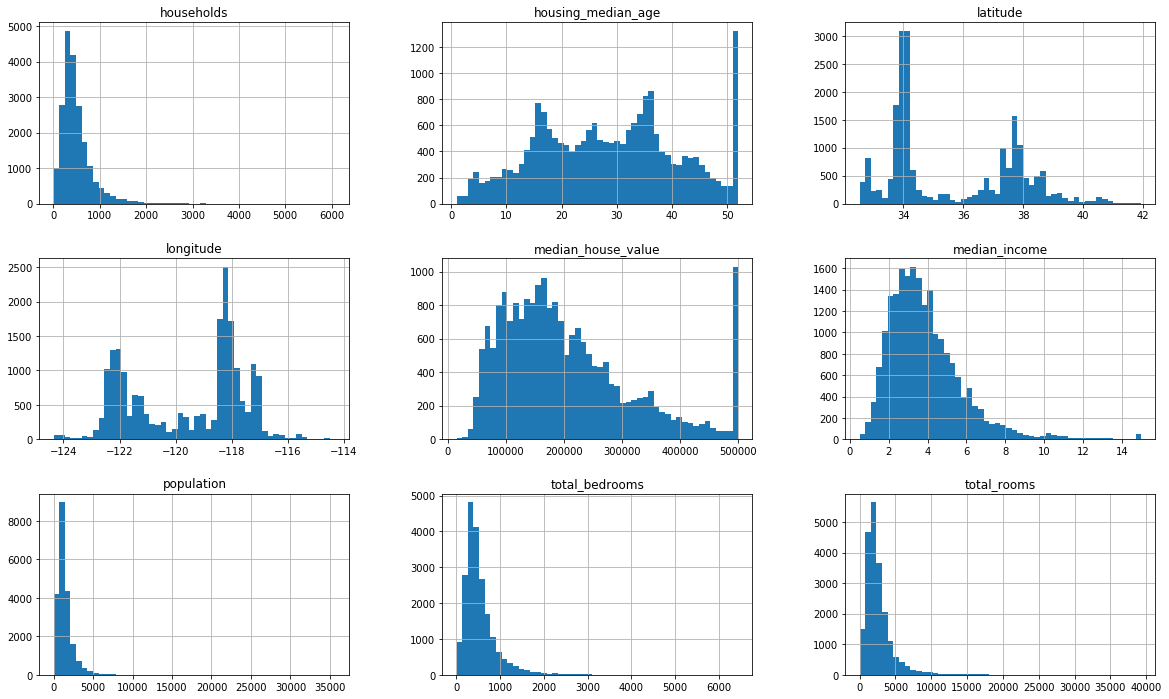

In [153]:
housing.hist(bins=50, figsize=(20,12))
plt.show()

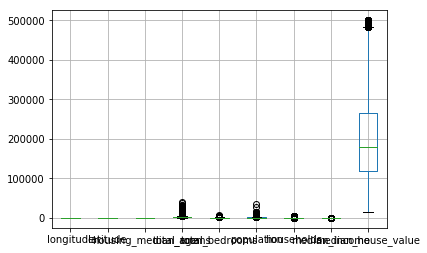

In [154]:
housing.boxplot(figsize=(20,12))
plt.show()

In [155]:
import numpy.random as rnd
rnd.seed(42) # to make this notebook's output identical at every run

def split_train_test(data, test_ratio):
    shuffled_indices = rnd.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), len(test_set))

16512 4128


In [156]:
import hashlib

def test_set_check(identifier, test_ratio, hash):
    return bytearray(hash(np.int64(identifier)).digest())[-1] < 256 * test_ratio

def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [157]:
housing_with_id = housing.reset_index()   # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")
test_set.head()

index  longitude  latitude  housing_median_age  total_rooms  \
4       4    -122.25     37.85                52.0       1627.0   
5       5    -122.25     37.85                52.0        919.0   
11     11    -122.26     37.85                52.0       3503.0   
20     20    -122.27     37.85                40.0        751.0   
23     23    -122.27     37.84                52.0       1688.0   

    total_bedrooms  population  households  median_income  median_house_value  \
4            280.0       565.0       259.0         3.8462            342200.0   
5            213.0       413.0       193.0         4.0368            269700.0   
11           752.0      1504.0       734.0         3.2705            241800.0   
20           184.0       409.0       166.0         1.3578            147500.0   
23           337.0       853.0       325.0         2.1806             99700.0   

   ocean_proximity  
4         NEAR BAY  
5         NEAR BAY  
11        NEAR BAY  
20        NEAR BAY  
23        NEAR BAY

In [158]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
test_set.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20046    -119.01     36.06                25.0       1505.0             NaN   
3024     -119.46     35.14                30.0       2943.0             NaN   
15663    -122.44     37.80                52.0       3830.0             NaN   
20484    -118.72     34.28                17.0       3051.0             NaN   
9814     -121.93     36.62                34.0       2351.0             NaN   

       population  households  median_income  median_house_value  \
20046      1392.0       359.0         1.6812             47700.0   
3024       1565.0       584.0         2.5313             45800.0   
15663      1310.0       963.0         3.4801            500001.0   
20484      1705.0       495.0         5.7376            218600.0   
9814       1063.0       428.0         3.7250            278000.0   

      ocean_proximity  
20046          INLAND  
3024           INLAND  
15663        NEAR BAY  
20484       <1H OCEAN  
9814       NEAR OCEAN

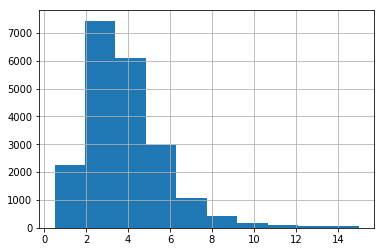

In [159]:
housing["median_income"].hist()
plt.show()

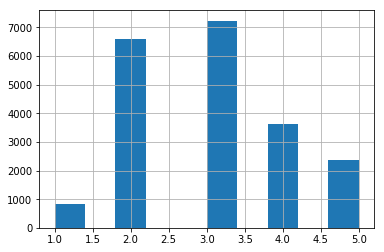

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

In [165]:
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] <5, 5.0, inplace=True)
# housing["income_cat"].value_counts()
housing["income_cat"].hist()
plt.show()
housing["income_cat"].value_counts()

In [166]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]


In [167]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100*compare_props["Random"] / compare_props["Overall"] -100
compare_props["Strat. %error"] =  100*compare_props["Stratified"] / compare_props["Overall"] -100

In [168]:
compare_props

Overall    Random  Stratified  Rand. %error  Strat. %error
1.0  0.039826  0.040213    0.039729      0.973236      -0.243309
2.0  0.318847  0.324370    0.318798      1.732260      -0.015195
3.0  0.350581  0.358527    0.350533      2.266446      -0.013820
4.0  0.176308  0.167393    0.176357     -5.056334       0.027480
5.0  0.114438  0.109496    0.114583     -4.318374       0.127011

In [169]:
for set in (strat_train_set, strat_test_set):
    set.drop("income_cat", axis=1, inplace=True)

In [170]:
compare_props.sum()

Overall          1.000000
Random           1.000000
Stratified       1.000000
Rand. %error    -4.402767
Strat. %error   -0.117833
dtype: float64

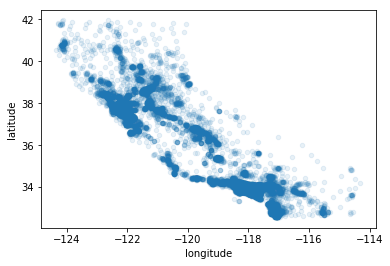

In [171]:
%matplotlib inline
housing.plot(kind="scatter", x="longitude", y="latitude",alpha=.1)

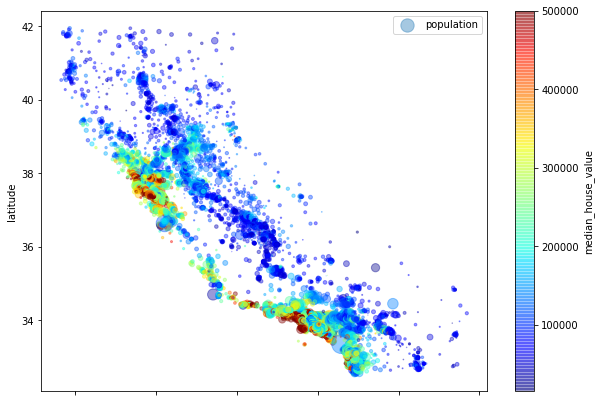

In [172]:
housing.plot(kind="scatter", x="longitude", y="latitude",
    s=housing['population']/100, label="population",
    c="median_house_value", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7),
)
plt.legend()
plt.show()

# Looking for Correlations

In [173]:
cor_mkatrix=housing.corr()

In [174]:
cor_mkatrix

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   
income_cat          -0.010690 -0.085528           -0.146920     0.220528   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_median_age       -0.320451   -0.296244   -0.302916      -0.119034   
total_rooms               0.930380    0.857126    0.918484       0.198050   
total_bedrooms            1.000000    0.877747    0.979728      -0.007723   
population                0.877747    1.000000    0.907222       0.004834   
households                0.979728    0.907222    1.000000       0.013033   
median_income            -0.007723    0.004834    0.013033       1.000000   
median_house_value        0.049686   -0.024650    0.065843       0.688075   
income_cat                0.015662    0.025809    0.038490       0.902750   

                    median_house_value  income_cat  
longitude                    -0.045967   -0.010690  
latitude                     -0.144160   -0.085528  
housing_median_age            0.105623   -0.146920  
total_rooms                   0.134153    0.220528  
total_bedrooms                0.049686    0.015662  
population                   -0.024650    0.025809  
households                    0.065843    0.038490  
median_income                 0.688075    0.902750  
median_house_value            1.000000    0.643892  
income_cat                    0.643892    1.000000

In [175]:
cor_mkatrix["median_house_value"].sort_values()

latitude             -0.144160
longitude            -0.045967
population           -0.024650
total_bedrooms        0.049686
households            0.065843
housing_median_age    0.105623
total_rooms           0.134153
income_cat            0.643892
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

/home/faisal/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


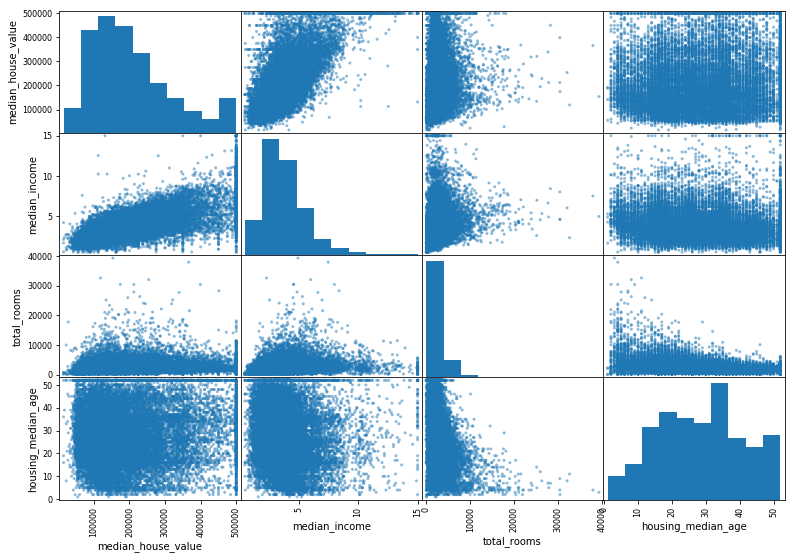

In [176]:
from pandas.tools.plotting import scatter_matrix 
attrb=["median_house_value", "median_income", "total_rooms","housing_median_age"]
scatter_matrix(housing[attrb],figsize=(13,9))
plt.show()

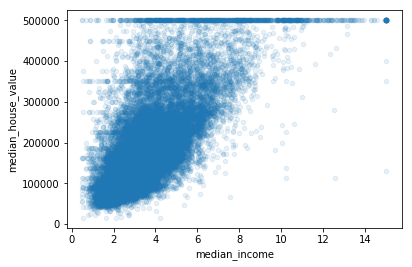

In [177]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",alpha=0.1)

# Experimenting with Attribute Combinations

In [178]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [179]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
income_cat                  0.643892
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

# Prepare the Data for Machine Learning Algorithms

In [180]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

## Data Cleaning - Working with missing values

Missing Values
Drop/Dropna - drop rwo or column
http://pandas.pydata.org/pandas-docs/version/0.18.1/generated/pandas.DataFrame.dropna.html
->axis = 1 is column and axis=0 is rows
df.drop('column_name', axis=1, inplace=True)
https://stackoverflow.com/questions/13411544/delete-column-from-pandas-dataframe

In [181]:
from sklearn.preprocessing import Imputer
imputer=Imputer(strategy="median")
housing_num=housing.drop("ocean_proximity",axis=1)
imputer.fit(housing_num)
X=imputer.transform(housing_num)#X is an np.array so needs to be converted to df.
housing_tr=pd.DataFrame(X,columns=housing_num.columns)

housing_tr.iloc[:3]


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -121.89     37.29                38.0       1568.0           351.0   
1    -121.93     37.05                14.0        679.0           108.0   
2    -117.20     32.77                31.0       1952.0           471.0   

   population  households  median_income  
0       710.0       339.0         2.7042  
1       306.0       113.0         6.4214  
2       936.0       462.0         2.8621

In [182]:
imputer.statistics_

array([ -118.51  ,    34.26  ,    29.    ,  2119.5   ,   433.    ,
        1164.    ,   408.    ,     3.5409])

In [183]:
housing_num.median().values

array([ -118.51  ,    34.26  ,    29.    ,  2119.5   ,   433.    ,
        1164.    ,   408.    ,     3.5409])

# Handling Text and Categorical Attributes

In [184]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
housing_cat=housing["ocean_proximity"]
housing_cat_encoded=labelencoder.fit_transform(housing_cat)
housing_cat_encoded

array([0, 0, 4, ..., 1, 0, 3])

One issue with this representation is that ML algorithms will assume that two nearby values are more similar than two distant values. Obviously this is not the case (for example, categories 0 and 4 are more similar than categories 0 and 1)

In [185]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()
housing_cat_1hotencode=encoder.fit_transform(housing_cat_encoded.reshape(-1,1))#Reshape with -1 below
housing_cat_1hotencode

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [186]:
np.arange(25).reshape(-1,5)

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [187]:
np.arange(12).reshape(3,-1)


array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [188]:
#One step 1hot encoder :
from sklearn.preprocessing import LabelBinarizer
encoder=LabelBinarizer()
housing_cat_1hotencode=encoder.fit_transform(housing_cat)
type(housing_cat_1hotencode)


numpy.ndarray

# Custom Transformers

In [189]:
#How working with diuvision 
pd1 = np.arange(12).reshape(3,4)
pd2 = np.arange(11,23,1).reshape(3,4)

pd2.shape
pd3= pd2[:,1]/pd1[:,1]
pd3

array([ 12.        ,   3.2       ,   2.22222222])

In [190]:
list(housing_num)
type(housing_num)

asd=housing_num[list(housing_num)].values
type(asd)

numpy.ndarray

In [191]:
from sklearn.base import BaseEstimator,TransformerMixin
#Also, if you add BaseEstimator as a base class (and avoid *args and **kargs in your constructor) 
#you will get two extra methods (get_params() and set_params()) that will be useful for automatic

#1.Select attributes from dataframe and return numpy.ndarray
class DataFrameSelector(BaseEstimator,TransformerMixin):
    def __init__(self,attributenames):
        self.attributenames=attributenames
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        return X[self.attributenames].values

rooms_ix, bedrooms_ix, population_ix, household_ix=3,4,5,6

class DerivedAttributesAddre(BaseEstimator,TransformerMixin):
    def __init__(self,add_bedroom_per_room=True):
        self.add_bedroom_per_room=add_bedroom_per_room
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        rooms_per_household=X[:,rooms_ix]/X[:,household_ix]
        population_per_household=X[:,population_ix]/X[:,household_ix]
        
        if self.add_bedroom_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X,rooms_per_household,population_per_household,bedrooms_per_room]
        else :
            return np.c_[X,rooms_per_household,population_per_household]


# Feature Scaling
Machine Learning algorithms don’t perform well when the input numerical attributes have very different scales.

Min-max scaling (many people call this normalization) is quite simple: values are shifted and rescaled so that they end up ranging from 0 to 1.
 We do this by subtracting the min value and dividing by the max minus the min.
 Scikit-Learn provides a transformer called MinMaxScaler for this.
 It has a feature_range hyperparameter that lets you change the range if you don’t want 0–1 for some reason.
 
 
 _*Standardization is quite different:*_ first it subtracts the mean value (so standardized values always have a zero mean), and then it divides by the variance so that the resulting distribution has unit variance.
 Unlike min-max scaling, standardization does not bound values to a specific range, which may be a problem for some algorithms (e.g.
, neural networks often expect an input value ranging from 0 to 1).
 However, standardization is much less affected by outliers.
 For example, suppose a district had a median income equal to 100 (by mistake).
 Min-max scaling would then crush all the other values from 0–15 down to 0–0.
 15, whereas standardization would not be much affected.
 Scikit-Learn provides a transformer called StandardScaler for standardization.


# Transformation Pipelines

In [192]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

num_pipeline=Pipeline([('imputer',Imputer(strategy="median")),
                       ('atribadder',DerivedAttributesAddre()),
                      ('standardscaler',StandardScaler())])

num_pipeline.fit_transform(housing_num)


array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ..., 
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

In [193]:
#Union of categorical value pipeline and add selectors
from sklearn.pipeline import FeatureUnion

num_attribs = list(housing_num)
categ_attrib=["ocean_proximity"]

num_pipeline=Pipeline([('selector',DataFrameSelector(num_attribs) ),('imputer',Imputer(strategy="median")),
                       ('atribadder',DerivedAttributesAddre()),
                      ('standardscaler',StandardScaler(),)])
cat_pipeline=Pipeline([('slector',DataFrameSelector(categ_attrib)),('lebel_binerizer',LabelBinarizer(),)])

full_pipeline=FeatureUnion(transformer_list=[('num_pipeline',num_pipeline),('cat_pipeline',cat_pipeline)])

housing_prepared = full_pipeline.fit_transform(housing)

In [194]:
housing_prepared.shape
list(housing)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'ocean_proximity']

# Select and Train a Model :)

In [195]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [197]:
some_data=housing.iloc[:5]
some_label=housing_labels.iloc[:5]

some_data_prep=full_pipeline.transform(some_data)
print("Predictions:",lin_reg.predict(some_data_prep))
print("Labels",list(some_label))



Predictions: [ 210644.60459286  317768.80697211  210956.43331178   59218.98886849
  189747.55849879]
Labels [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [199]:
from sklearn.metrics import mean_squared_error
housing_predictions=lin_reg.predict(housing_prepared)
line_mse=mean_squared_error(housing_predictions,housing_labels)
line_rmse=np.sqrt(line_mse)
line_rmse

68628.198198489219

In [201]:
from sklearn.tree import DecisionTreeRegressor

tree_reg=DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)
housing_pred=tree_reg.predict(housing_prepared)

tree_mse=mean_squared_error(housing_pred,housing_labels)
tree_rmse=np.sqrt(tree_mse)
tree_rmse


0.0